# Analyse du fichier Steam Requirements

### Le but ici est de savoir si les données vont nous être utile concernant les configurations nécessaires pour chaque jeu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import du dataset cleané et du data set des requirements dans le but de les merge 

req_df = pd.read_csv('../raw_data/steam_requirements_data.csv')
publisher_df = pd.read_csv('../raw_data/publisher_df.csv')


In [3]:
req_df.head(3)

,steam_appid,pc_requirements,mac_requirements,linux_requirements,minimum,recommended
0,10,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
1,20,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
2,30,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN


In [4]:
publisher_df.head(3)

,steam_appid,name,release_date,developer,publisher,pub_nb_games,owner_median
0,7340,Azada,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0
1,50910,Professor Fizzwizzle and the Molten Mystery,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0
2,50920,Hidden Expedition: Amazon,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0


In [5]:
req_df.shape, publisher_df.shape

((27319, 6), (26867, 7))

### MERGE

In [6]:
# Merge du df publisher_df et req_df en inner pour enlever les lignes en trop du 'requirements'

pub_req = pd.merge(publisher_df, req_df, how="inner", on="steam_appid")

In [7]:
pub_req.columns

Index(['steam_appid', 'name', 'release_date', 'developer', 'publisher',
       'pub_nb_games', 'owner_median', 'pc_requirements', 'mac_requirements',
       'linux_requirements', 'minimum', 'recommended'],
      dtype='object')

In [8]:
# Nombre de lignes OK

pub_req.shape

(26867, 12)

In [9]:
pub_req.isna().sum()

steam_appid               0
name                      0
release_date              0
developer                 0
publisher                 0
pub_nb_games              0
owner_median              0
pc_requirements           0
mac_requirements          0
linux_requirements        0
minimum                   5
recommended           12882
dtype: int64

### Analyse du df

In [10]:
pub_req.head(5)

,steam_appid,name,release_date,developer,publisher,pub_nb_games,owner_median,pc_requirements,mac_requirements,linux_requirements,minimum,recommended
0,7340,Azada,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,"{'minimum': '<ul class=""bb_ul""><li><strong>OS:...",{'minimum': '<strong>Minimum:</strong><br><ul ...,[],OS: Windows 2000/XP/Vista Processor: 600 Mhz M...,NaN
1,50910,Professor Fizzwizzle and the Molten Mystery,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,{'minimum': '<ul>\n\t\t\t\t\t\t\t\t<li><strong...,{'minimum': '<ul>\n\t\t\t\t\t\t<li><strong>OS:...,[],OS: Windows 2000/XP/VistaProcessor: 600 Mhz or...,NaN
2,50920,Hidden Expedition: Amazon,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,"{'minimum': '<ul class=""bb_ul""><li><strong>OS:...",[],[],OS: Windows 2000/XP/Vista Processor: 800 Mhz M...,NaN
3,50930,Hidden Expedition: Everest,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,"{'minimum': '<ul class=""bb_ul""><li><strong>OS:...",[],[],OS: Windows 2000/XP/Vista Processor: 600 Mhz o...,NaN
4,50940,Hidden Expedition: Titanic,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,"{'minimum': '<ul class=""bb_ul""><li><strong>OS:...",[],[],OS: Windows 2000/XP/Vista Processor: 600 Mhz o...,NaN


In [11]:
# Drop des plus gros publishers ( owners_median > 7500000)


pub_req = pub_req.drop(pub_req[pub_req.owner_median >=7500000].index)

In [12]:
pub_req.isnull().sum()

steam_appid               0
name                      0
release_date              0
developer                 0
publisher                 0
pub_nb_games              0
owner_median              0
pc_requirements           0
mac_requirements          0
linux_requirements        0
minimum                   5
recommended           12857
dtype: int64

#### Colonne 'recommended'

In [13]:
# Remplacement des Nan par des 0 pour pouvoir filtrer sur la colonne

pub_req['recommended'] = pub_req['recommended'].fillna(0)

In [14]:
pub_req.shape

(26799, 12)

In [15]:
#Présence d'une config. minimale pour 52 % des jeux !

pub_req[['recommended']][pub_req['recommended'] != 0].shape, pub_req[['recommended']][pub_req['recommended'] == 0].shape

((13942, 1), (12857, 1))

In [16]:
pub_req['release_date'] = pd.to_datetime(pub_req['release_date'])

### Filtre de la colonne 

In [17]:
with_reco = pub_req[pub_req['recommended']!=0].sort_values(by='release_date', ascending=False)

<AxesSubplot:>

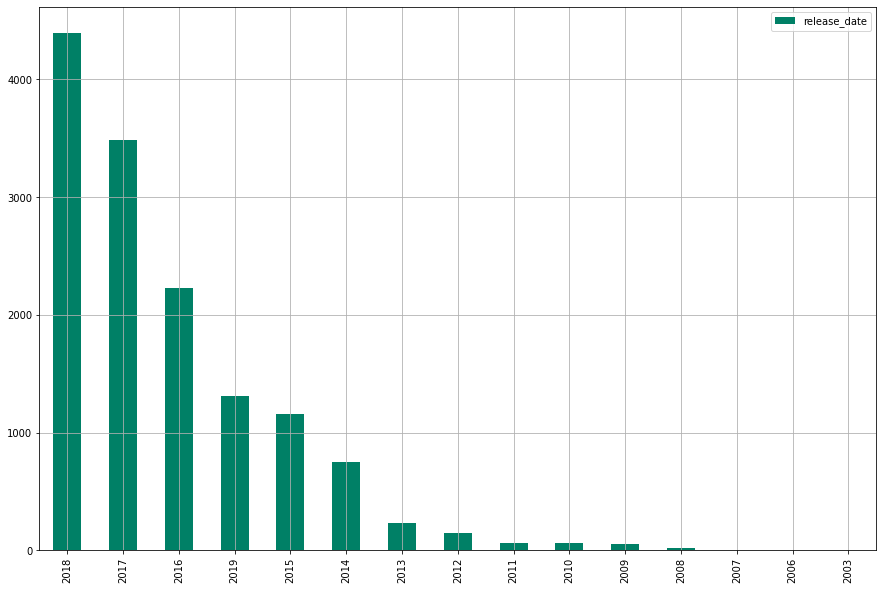

In [18]:
# Nombre de jeux achetés selon les années AVEC une recommandation 

with_reco[['name','release_date','owner_median','recommended']].sort_values(by='release_date', ascending=False)
with_reco['release_date'].dt.year.value_counts().plot(kind = 'bar',figsize=(15,10), colormap='summer', grid=True, legend=True)

In [19]:
# Nombre de jeux selon le nombre de ventes

with_reco['owner_median'].value_counts()


10000.0      9521
35000.0      1569
75000.0       884
150000.0      750
350000.0      632
750000.0      283
1500000.0     178
3500000.0     125
Name: owner_median, dtype: int64

______

______

In [25]:
# Nombre de jeux selon le nombre de vente


without_reco['owner_median'].value_counts()


10000.0      9008
35000.0      1449
75000.0       791
150000.0      617
350000.0      608
750000.0      210
1500000.0     108
3500000.0      66
Name: owner_median, dtype: int64

In [23]:
without_reco = pub_req[pub_req['recommended']==0].sort_values(by='owner_median', ascending=False)

<AxesSubplot:>

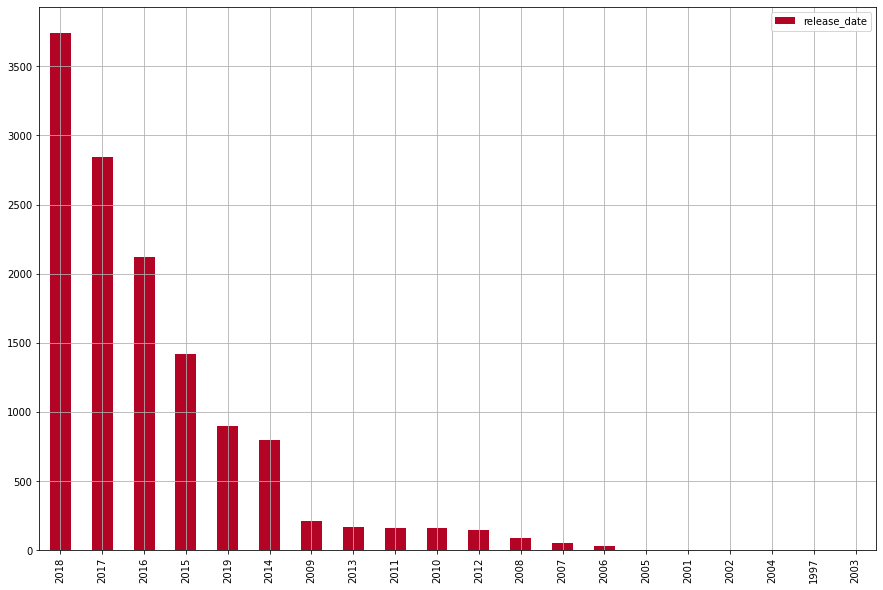

In [24]:
# Nombre de jeux achetés selon les années SANS recommandation de config 

without_reco[['name','release_date','owner_median','recommended']].sort_values(by='release_date', ascending=False)
without_reco['release_date'].dt.year.value_counts().plot(kind = 'bar',figsize=(15,10), colormap='coolwarm_r', grid=True, legend=True)

____

### Croisement avec le dataset d'Etienne (qui estime le nombre de téléchargements d'un jeu)

In [34]:
df_tmp = pd.read_csv('../raw_data/data_final.csv')
df_tmp.head(3)

,steam_appid,name,top_5_tags,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,...,topic_15,topic_16,topic_17,topic_18,topic_19,english,price,has_a_website,nb_review,owner_estimated
0,10,Counter-Strike,action fps multiplayer shooter classic,0.015903,0.015903,0.015903,0.015903,0.697844,0.015903,0.015903,...,0.015903,0.015903,0.015903,0.015903,0.015903,1,7.19,0,127873,15000000.0
1,30,Day of Defeat,fps world_war_ii multiplayer action shooter,0.015969,0.015969,0.015969,0.015969,0.696585,0.015969,0.015969,...,0.015969,0.015969,0.015969,0.015969,0.015969,1,3.99,1,3814,7500000.0
2,50,Half-Life: Opposing Force,fps action sci_fi singleplayer classic,0.015922,0.015922,0.015922,0.015922,0.697483,0.015922,0.015922,...,0.015922,0.015922,0.015922,0.015922,0.015922,1,3.99,0,5538,7500000.0


In [35]:
pub_req.shape

(26799, 12)

In [36]:
df_tmp.shape

(26867, 28)

In [37]:
df = pd.merge(pub_req, df_tmp, how="inner", on="steam_appid")

In [38]:
df.shape

(26799, 39)

In [39]:
df.columns

Index(['steam_appid', 'name_x', 'release_date', 'developer', 'publisher',
       'pub_nb_games', 'owner_median', 'pc_requirements', 'mac_requirements',
       'linux_requirements', 'minimum', 'recommended', 'name_y', 'top_5_tags',
       'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',
       'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11',
       'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17',
       'topic_18', 'topic_19', 'english', 'price', 'has_a_website',
       'nb_review', 'owner_estimated'],
      dtype='object')

In [40]:
df = df.drop(columns=['pc_requirements', 'mac_requirements','linux_requirements', 'minimum','name_y', 'top_5_tags',
       'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',
       'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11',
       'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17',
       'topic_18', 'topic_19'])

In [43]:
df = df.rename({'name_x': 'name'},axis=1)

df

,steam_appid,name,release_date,developer,publisher,pub_nb_games,owner_median,recommended,english,price,has_a_website,nb_review,owner_estimated
0,7340,Azada,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,6.99,1,12,2496.0
1,50910,Professor Fizzwizzle and the Molten Mystery,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,4.99,1,12,2496.0
2,50920,Hidden Expedition: Amazon,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,6.99,1,12,2496.0
3,50930,Hidden Expedition: Everest,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,6.99,1,5,1040.0
4,50940,Hidden Expedition: Titanic,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,6.99,1,6,1248.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26794,1060770,"Die, zombie sausage, die!",2019-04-24,AuroraCorp,Aurora software,1,10000.0,OS: windows7 Memory: 4 GB RAM Graphics: Nvidia...,1,0.79,0,1,208.0
26795,858100,Grimshade,2019-03-26,TALEROCK,Asterion Games,1,10000.0,OS: Windows 7 SP1 64-bit or Windows 8.1 64-bit...,1,15.99,1,86,17888.0
26796,832420,ICED VR,2018-05-29,Anea_Duo_Dev,Anea_Duo_Dev,1,10000.0,"OS: Windows 7, 8, 8.1, 10 Processor: Intel Cor...",1,7.19,0,9,1872.0
26797,659100,Skyfall,2017-07-28,AYE Technology,AYE Technology,1,10000.0,OS: Windows 7 or later Processor: Intel Core i...,1,2.79,0,24,4992.0


In [59]:
df.recommended = df.recommended.apply(lambda x: 1 if x != 0 else 0)
df.recommended.unique()

array([0, 1])

In [60]:
df.corr().style.background_gradient(cmap='coolwarm')

,steam_appid,pub_nb_games,owner_median,recommended,english,price,has_a_website,nb_review,owner_estimated
steam_appid,1.000000,-0.152736,-0.298279,0.055697,-0.116577,-0.166755,-0.323577,-0.185063,-0.286036
pub_nb_games,-0.152736,1.000000,0.057209,-0.118415,0.020597,0.127123,0.002219,0.038252,0.053681
owner_median,-0.298279,0.057209,1.000000,0.033262,0.025557,0.116655,0.103641,0.720167,0.995716
recommended,0.055697,-0.118415,0.033262,1.000000,-0.026062,0.124397,0.020225,0.052189,0.039146
english,-0.116577,0.020597,0.025557,-0.026062,1.000000,0.007727,0.057316,0.017103,0.023807
price,-0.166755,0.127123,0.116655,0.124397,0.007727,1.000000,0.193846,0.187963,0.133268
has_a_website,-0.323577,0.002219,0.103641,0.020225,0.057316,0.193846,1.000000,0.079061,0.103524
nb_review,-0.185063,0.038252,0.720167,0.052189,0.017103,0.187963,0.079061,1.000000,0.737137
owner_estimated,-0.286036,0.053681,0.995716,0.039146,0.023807,0.133268,0.103524,0.737137,1.000000


#### On peut conclure ici que la mention d'une configuration récommandée de la machine aura une faible correlation avec le prix..

#### 

#### Croisement avec le dataset d'Etienne part.2 pour vérifier la corrélation avec les features : ratings et popularity 

In [71]:
tmp = pd.read_csv('../raw_data/data_clean_rp.csv')
tmp

,steam_appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,...,owner_median,owner_lower,owner_upper,has_a_website,nb_review,owner_estimated,revenu,1,rating,popularity
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,15000000.0,10000000,20000000,0,127873,15000000.0,1.078500e+08,1,105245.3,115000.625
1,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,...,7500000.0,5000000,10000000,1,3814,7500000.0,2.992500e+07,1,105245.3,115000.625
2,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,...,7500000.0,5000000,10000000,1,28855,7500000.0,5.392500e+07,1,105245.3,115000.625
3,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,...,15000000.0,10000000,20000000,0,13559,15000000.0,1.078500e+08,1,105245.3,115000.625
4,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,...,15000000.0,10000000,20000000,1,70321,15000000.0,1.078500e+08,1,105245.3,115000.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26862,1063060,MonteCube Dodge,2019-04-22,1,MonteCube,MonteCube,windows,Single-player,Action;Adventure;Casual;Indie;Early Access,Early Access;Action;Indie,...,10000.0,0,20000,0,2,416.0,8.694400e+02,1,2.0,2.000
26863,1064060,The Mystery of Bikini Island,2019-04-24,1,Velvet Paradise Games,Velvet Paradise Games,windows,Single-player,Adventure;Casual;Indie;RPG;Early Access,Early Access;Adventure;Sexual Content,...,10000.0,0,20000,1,3,624.0,4.929600e+02,1,3.0,3.000
26864,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,...,10000.0,0,20000,0,3,624.0,1.304160e+03,1,3.0,3.000
26865,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,...,10000.0,0,20000,0,9,1872.0,3.163680e+03,1,7.4,8.300


In [72]:
tmp.columns

Index(['steam_appid', 'name', 'release_date', 'english', 'developer',
       'publisher', 'platforms', 'categories', 'genres', 'steamspy_tags',
       ...
       'owner_median', 'owner_lower', 'owner_upper', 'has_a_website',
       'nb_review', 'owner_estimated', 'revenu', '1', 'rating', 'popularity'],
      dtype='object', length=405)

In [79]:
tmp_l = tmp[['steam_appid','rating','popularity','revenu']]

In [80]:
df_rp = pd.merge(df, tmp_l, how='inner', on='steam_appid')

In [81]:
df_rp.shape

(26799, 16)

In [82]:
df_rp.columns

Index(['steam_appid', 'name', 'release_date', 'developer', 'publisher',
       'pub_nb_games', 'owner_median', 'recommended', 'english', 'price',
       'has_a_website', 'nb_review', 'owner_estimated', 'rating', 'popularity',
       'revenu'],
      dtype='object')

In [83]:
df_rp

,steam_appid,name,release_date,developer,publisher,pub_nb_games,owner_median,recommended,english,price,has_a_website,nb_review,owner_estimated,rating,popularity,revenu
0,7340,Azada,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,6.99,1,12,2496.0,10.228571,13.635714,17447.04
1,50910,Professor Fizzwizzle and the Molten Mystery,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,4.99,1,12,2496.0,10.228571,13.635714,12455.04
2,50920,Hidden Expedition: Amazon,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,6.99,1,12,2496.0,10.228571,13.635714,17447.04
3,50930,Hidden Expedition: Everest,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,6.99,1,5,1040.0,10.228571,13.635714,7269.60
4,50940,Hidden Expedition: Titanic,2010-04-21,Big Fish Games,Big Fish Games,212,10000.0,0,1,6.99,1,6,1248.0,10.228571,13.635714,8723.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26794,1060770,"Die, zombie sausage, die!",2019-04-24,AuroraCorp,Aurora software,1,10000.0,1,1,0.79,0,1,208.0,1.000000,1.000000,164.32
26795,858100,Grimshade,2019-03-26,TALEROCK,Asterion Games,1,10000.0,1,1,15.99,1,86,17888.0,58.800000,74.100000,286029.12
26796,832420,ICED VR,2018-05-29,Anea_Duo_Dev,Anea_Duo_Dev,1,10000.0,1,1,7.19,0,9,1872.0,44.450000,69.650000,13459.68
26797,659100,Skyfall,2017-07-28,AYE Technology,AYE Technology,1,10000.0,1,1,2.79,0,24,4992.0,-4.600000,6.800000,13927.68


In [94]:
df_rp.corr().style.background_gradient(cmap='coolwarm',text_color_threshold=0.850)

,steam_appid,pub_nb_games,owner_median,recommended,english,price,has_a_website,nb_review,owner_estimated,rating,popularity,revenu
steam_appid,1.000000,-0.152736,-0.298279,0.055697,-0.116577,-0.166755,-0.323577,-0.185063,-0.286036,-0.175935,-0.184616,-0.187198
pub_nb_games,-0.152736,1.000000,0.057209,-0.118415,0.020597,0.127123,0.002219,0.038252,0.053681,0.034760,0.039887,0.073484
owner_median,-0.298279,0.057209,1.000000,0.033262,0.025557,0.116655,0.103641,0.720167,0.995716,0.522811,0.535423,0.688464
recommended,0.055697,-0.118415,0.033262,1.000000,-0.026062,0.124397,0.020225,0.052189,0.039146,0.029407,0.034733,0.059197
english,-0.116577,0.020597,0.025557,-0.026062,1.000000,0.007727,0.057316,0.017103,0.023807,0.015822,0.016642,0.015440
price,-0.166755,0.127123,0.116655,0.124397,0.007727,1.000000,0.193846,0.187963,0.133268,0.140433,0.150963,0.308945
has_a_website,-0.323577,0.002219,0.103641,0.020225,0.057316,0.193846,1.000000,0.079061,0.103524,0.073298,0.077116,0.079590
nb_review,-0.185063,0.038252,0.720167,0.052189,0.017103,0.187963,0.079061,1.000000,0.737137,0.634609,0.642055,0.724217
owner_estimated,-0.286036,0.053681,0.995716,0.039146,0.023807,0.133268,0.103524,0.737137,1.000000,0.531490,0.544115,0.700789
rating,-0.175935,0.034760,0.522811,0.029407,0.015822,0.140433,0.073298,0.634609,0.531490,1.000000,0.990896,0.464979


_____________

___________________

In [93]:
'''
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        pub_req['pc_requirements'] = text.replace(punctuation, ' ')
    return text
# Apply to the DF series
pub_req['pc_requirements2'] = pub_req['pc_requirements'].apply(remove_punctuations)
'''

"\nimport string\n\ndef remove_punctuations(text):\n    for punctuation in string.punctuation:\n        pub_req['pc_requirements'] = text.replace(punctuation, ' ')\n    return text\n# Apply to the DF series\npub_req['pc_requirements2'] = pub_req['pc_requirements'].apply(remove_punctuations)\n"

In [120]:
df_rp.to_csv(r'../raw_data/data_clean0312.csv', index = False)